# Classificação usando Nearest Neighbors (kNN)

**Introdução**

Este código tem como objetivo aplicar o algoritmo kNN para identificar o tipo da comida (fruta, vegetal ou proteina), utilizando como classificação a sua doçura e crocância. Os dados utilizados estão no arquivo "FoodType.csv" 

**Coleção dos dados**

* Primeiro vamos importar os dados do arquivo "FoodType.csv", em formato de DataFrame utilizando a função **pandas.read_csv('filepath_or_buffer')** da biblioteca pandas
* utilizar a função **DataFrame.head()** para verificar os tipos dos dados de cada coluna


In [1]:
import pandas as pd
data = pd.read_csv("FoodType.csv")
data.head()

,Ingrediente,Docura,Crocancia,Classe
0,maca,10,9,fruta
1,bacon,1,4,proteina
2,banana,10,1,fruta
3,cenoura,7,10,vegetal
4,aipo,3,10,vegetal


**Separação dos dados**
* Utiliza-se a função **DataFrame.pop(item)** para separar a coluna de `Classe` , armazenando-a em `label_train`
* Separar a coluna `Ingrediente`

In [2]:
label_train = data.pop('Classe')
ingredient =  data.pop('Ingrediente')

data.head()

,Docura,Crocancia
0,10,9
1,1,4
2,10,1
3,7,10
4,3,10


**Criação de um DataFrame para testar o algoritmo kNN**

In [3]:
#criar o Data Frame de teste
test = {'Docura': [6, 3], 'Crocancia': [4, 3]}
df_test = pd.DataFrame(test, 
                       columns=('Docura', 'Crocancia'), 
                       index=('tomate', 'frango'))

#imprimir o Data Frame
df_test


,Docura,Crocancia
tomate,6,4
frango,3,3


**Exibição dos dados utilizados para treino e teste**
* utilização da biblioteca **matplotlib.pyplot**

Text(0,0.5,'Crocância')

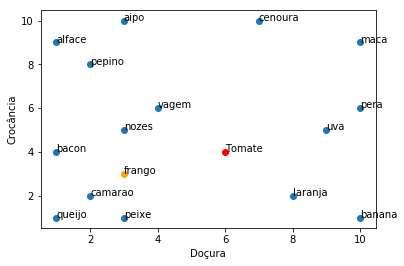

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(data.Docura, data.Crocancia)
for i, txt in enumerate(ingredient):
    ax.annotate(txt, (data.Docura[i], data.Crocancia[i]))

ax.scatter(df_test.Docura['tomate'], 
           df_test.Crocancia['tomate'], 
           c='Red')

ax.scatter(df_test.Docura['frango'], 
           df_test.Crocancia['frango'], 
           c='Orange')

ax.annotate('Tomate', (df_test.Docura['tomate'], 
                       df_test.Crocancia['tomate']))

ax.annotate('frango', (df_test.Docura['frango'], 
                       df_test.Crocancia['frango']))

#inserir título nos eixos
plt.xlabel('Doçura')
plt.ylabel('Crocância')

**Treinar o modelo**
* Treinar o algoritmo kNN, existente na biblioteca **sklearn.neighbors**, com esses dados.
* Utilize-se o número de vizinhos igual a 5.
* Testar o código com o DataFrame criado anteriormente (`df_test`).

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn = knn.fit(data, label_train)

y_pred = knn.predict(df_test)

#imprimir o resultado
print('tomate:', y_pred[0])
print('frango:', y_pred[1])


tomate: fruta
frango: proteina
